### importing libraries and reading data

In [1]:
import pandas as pd
data=pd.read_csv('gold_price_data.csv',index_col='Date',parse_dates=['Date'], dayfirst=False)


In [2]:
#check top 5 rows
data.head(5)

,Value
Date,
1970-01-01,35.2
1970-04-01,35.1
1970-07-01,35.4
1970-10-01,36.2
1971-01-01,37.4


In [3]:
#to see size of file
data.shape

(10787, 1)

In [4]:
#tocheck file information
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10787 entries, 1970-01-01 to 2020-03-13
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   10787 non-null  float64
dtypes: float64(1)
memory usage: 168.5 KB


In [5]:
#to check is there null values
data.isnull().sum()

Value    0
dtype: int64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sb

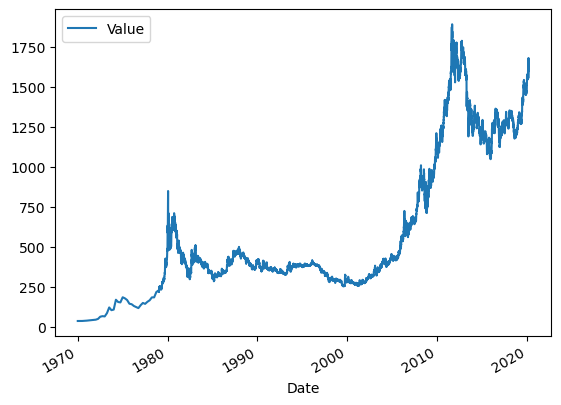

In [7]:
data.plot();

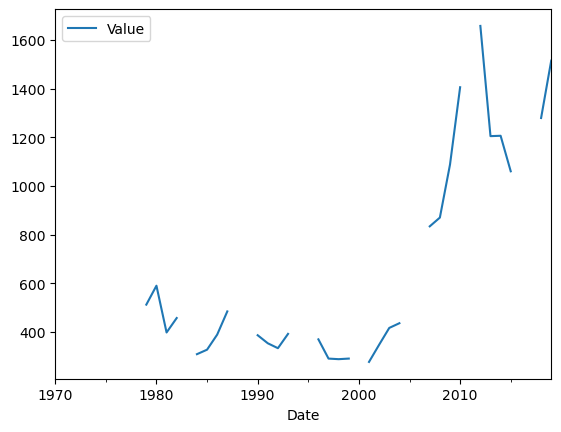

In [8]:
#yearliy wise plot
data.asfreq('Y').plot();

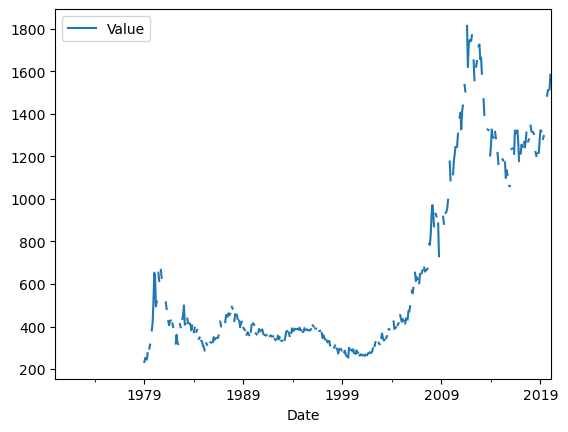

In [9]:
#monthwise plot
data.asfreq('M').plot();

In [10]:
from statsmodels.tsa.stattools import kpss

In [11]:
stats,p,lags,critical_values=kpss(data,'ct')
print(stats)
print(p)
print(lags)
print(critical_values)
if p<0.05:
    print("series is not stationary")
else:
    print("series Stationary")
        


3.0836483360922196
0.01
60
{'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
series is not stationary


C:\Users\nagam\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [12]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(data)

In [13]:
print("statisticall test ",result[0])
print("p-value  ",result[1])
print("critical value  ",result[2])
if result[1]>0.05:
    print("series is not stationary")
else:
    print("series are stationary")

statisticall test  -0.07112124453813173
p-value   0.9522400769147397
critical value   39
series is not stationary


<AxesSubplot:xlabel='Date'>

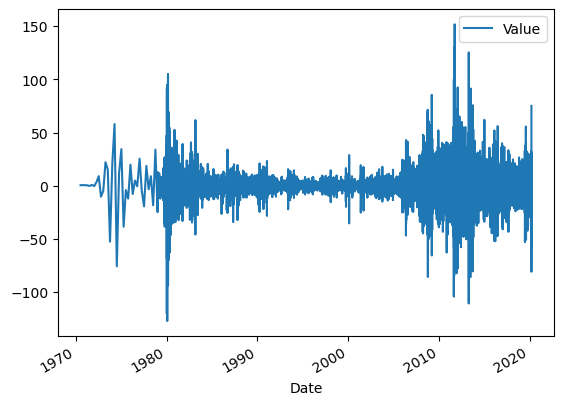

In [15]:
#takinf differenceing 
data=data-data.shift(1)
data.dropna().plot()

In [19]:
result=adfuller(data.dropna())
print("statistical test ",result[0])
print("p-value  ",result[1])
print("critical value  ",result[2])
if result[1]>0.05:
    print("series is not stationary")
else:
    print("series are stationary")

statisticall test  -28.052123636569025
p-value   0.0
critical value   39
series are stationary
